Hard coding the probabilities of simple model

Payoffs for sellers 1,2:

Cost C1, C2 are on the bernoulli distribution:

$C_i ~ B(0,0.5)$

Bid from single Bidder is uniformly distributed:

$V ~ [0,1]$


import numpy as np


In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Suppose there is equal chance of 0, 0.5

    c1   c2  Prob
0  0.5  0.5  0.25
1  0.5  0.0  0.25
2  0.0  0.5  0.25
3  0.0  0.0  0.25


Suppose that P1, P2 are defined by the following function:

In [42]:
def p(c1,c2):
    p1 = c1 + x
    p2 = c2 + x
    return p1, p2

def v(p1,p2):
    if p1+p2 > 1:
        successTransfer = 0
    else:
        successTransfer = 1 - (p1+p2)
    return successTransfer

def revenue(c1,c2,p1,p2):
    r1 = p1-c1
    r2 = p2-c2
    return r1, r2

#Calculate utility

def payoff(Prob, successProb,r1,r2):
    payoff1 = successProb * r1 * Prob
    payoff2 = successProb * r2 * Prob
    utility = payoff1 + payoff2
    return utility

lmbda = 0

probMatrix = np.matrix([[0.5,0.5, lmbda*lmbda],[0.5,0, lmbda*(1-lmbda)],[0,0.5,lmbda*(1-lmbda)],[0,0,(1-lmbda)*(1-lmbda)]])
names =["c1","c2","Prob"]
probMatrix = pd.DataFrame(probMatrix, columns=names)

For lambda value 0.0:
The x values that give the highest total utility range from 0.25 to 0.25
The highest total utility is: 0.25
-----
For lambda value 0.1:
The x values that give the highest total utility range from 0.23 to 0.23
The highest total utility is: 0.20451600000000006
-----
For lambda value 0.2:
The x values that give the highest total utility range from 0.21 to 0.21
The highest total utility is: 0.16665600000000005
-----
For lambda value 0.3:
The x values that give the highest total utility range from 0.19 to 0.19
The highest total utility is: 0.134596
-----
For lambda value 0.4:
The x values that give the highest total utility range from 0.18 to 0.18
The highest total utility is: 0.10713600000000002
-----
For lambda value 0.5:
The x values that give the highest total utility range from 0.17 to 0.17
The highest total utility is: 0.08329999999999999
-----
For lambda value 0.6:
The x values that give the highest total utility range from 0.16 to 0.16
The highest total utility

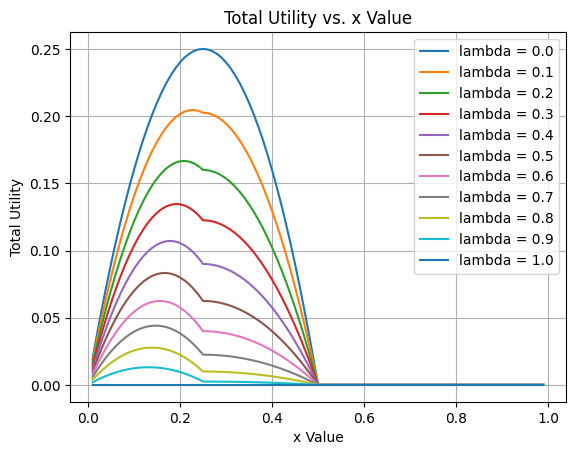

In [48]:
x_values = [i/100 for i in range(1,100)] # Gives [0.01, 0.02, ... 0.99]
lmbda_values = [i/10 for i in range(0,11)] #Gives [0.1, 0.2, 0.3..., 1]

# Assuming p, v, revenue, and payoff functions are already defined

all_utilities = []

for lmbda in lmbda_values:
    total_utilities = []
    probMatrix["Prob"] = [lmbda*lmbda, lmbda*(1-lmbda), lmbda*(1-lmbda), (1-lmbda)*(1-lmbda)]
    
    for x in x_values:
        probMatrix[['p1', 'p2']] = probMatrix.apply(lambda row: p(row['c1'], row['c2']), axis=1, result_type='expand')
        probMatrix['successProb'] = probMatrix.apply(lambda row: v(row['p1'], row['p2']), axis=1, result_type='expand')
        probMatrix[['r1', 'r2']] = probMatrix.apply(lambda row: revenue(row['c1'], row['c2'], row['p1'], row['p2']), axis=1, result_type='expand')
        probMatrix['utility'] = probMatrix.apply(lambda row: payoff(row['successProb'], row['Prob'], row['r1'], row['r2']), axis=1, result_type='expand')

        total_utility = probMatrix['utility'].sum()
        total_utilities.append(total_utility)
    
    all_utilities.append(total_utilities)
    
    max_utility_value = max(total_utilities)
    indices_of_max_utility = [i for i, j in enumerate(total_utilities) if j == max_utility_value]
    
    x_values_with_max_utility = [x_values[i] for i in indices_of_max_utility]
    
    plt.plot(x_values, total_utilities, label=f'lambda = {lmbda}')
    
    print(f"For lambda value {lmbda}:")
    print(f"The x values that give the highest total utility range from {min(x_values_with_max_utility)} to {max(x_values_with_max_utility)}")
    print(f"The highest total utility is: {max_utility_value}")
    print("-----")

plt.xlabel('x Value')
plt.ylabel('Total Utility')
plt.title('Total Utility vs. x Value')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

In [49]:
max_utility_value = max(total_utilities)
index_of_max_utility = total_utilities.index(max_utility_value)
x_value_with_max_utility = x_values[index_of_max_utility]

print(f"The x value that gives the highest total utility is: {x_value_with_max_utility}")
print(f"The highest total utility is: {max_utility_value}")

The x value that gives the highest total utility is: 0.01
The highest total utility is: 0.0
